# RL (Reinforcement Learning)
* MDP (Markov Decision Process)
* Q Learning
* DQN (Deep Q Networks)

## Shorcut acronym: AREAs 51.
* Entities of a RL program are: Action Reward Environment Agent states
* Goal: Maximise Cumulative Reward or Maximise expected discounted return of rewards

# MDP
* S = States, A = Actions, R = Reward. Each has finite number of elements
* At time = t: State Action pair = (S_t,A_t)
* Reward receiving function = f( S_t,A_t ) = R_t+1
* Hence sequence = S_0,A_0,R_1,S_1,A_1,R_2,... 
* Return = Sum of future rewards:
    * Discount Rate = Y (gamma) 0<Y<1
    * G_t = R_t+1 + (Y)x(R_t+2) + (Y^2)x(R_t+3) + ... + (Y^k)x(R_T), (T = final time step) OR
    * G_t = R_t+1 + (Y)x(G_t+1)
    * Influence of future rewards diminishes drastically, hence make hay while the sun shines
    
###### value function --> expected return --> the way the agent acts --> policy
* Policies (pi) : Probability that an agent will select an action from a state
* Value Function: How good is an action or state for the agent following a policy (pi)
    * State value function (v_pi): Value of state following a policy pi
    * Action value function: Value of action following a policy pi
        * Q function = Expectation of Q value:
            * q_pi (s,a) = E ( G_t ) where S_t = s, At = a

* Optimal Policy: 
    * Expected return is: v_pi (s)
    * pi > pi' iff v_pi (s) >= v_pi' (s) where s = state
* Optimal Value function:
    * Optimal State Value function:  
        * v_* (s) >= max( v_pi (s) )
        * Hence v_* (s) = larget expected return achievable by any policy pi for each state
    * Optimal Action Value function: 
        * Optimal Q value = q_* (s,a) = max( q_pi (s,a) )
        * Hence q_* (s,a) = larget expected return achievable by any policy pi for each state-action pair
        * q_* (s,a) MUST satisfy Bellman optimality equation 
        * Loss = q_* (s,a) - q (s,a)

# Q Learning
* Visualised using a Q table, rows = states and columns = actions
* Epsilon greedy strategy: Exploration vs Exploitation
    * 0 < epsilon < 1, 0 < learning rate < 1
    * At the start of a program: epsilon = 1 = Exploration mode
    * Then epsilon decreases below 0.5 = Exploitation mode
    * Optimal Q value = q_* (s,a) = max( q_pi (s,a) )
    * Loss = q_* (s,a) - q (s,a)
    
    
# Deep Q Learning
* Multiple states --> Neural Network --> Multiple q values, q(s,a_n)
* In case of image input (screenshots of states in a video game) : image is first grayscaled, resized and cropped --> CNN
* Q values suggest what next action to take
* Experience replay: 
    * e_t = ( s_t, a_t, r_t+1, s_t+1 )
    * Current state, Current action, Next state reward, Next state
    * Random (to eliminate any correlation problem) experience is chosen as input to a neural network
    
* Loss calculation between output Q value and target Q value: 
    * Two Forward passes and then weights and biases are updated
    * At e = ( s, a ,r', s' ): 
        * s ---> NN ---> q(s,a_a) + q(s_1,a_b) + q(s_1,a_c) + q(s_1,a_d)
        * s' ---> NN ---> q(s',a'_a) + q(s',a'_b) + q(s',a'_c) + q(s',a'_d)
        * Calculate Loss, Update weights in NN to minimize loss
* Problem: s and s' share the same NN and have only one step between them ==> Optimization is chasing its own tail ==> Unstable
* Solution: 
    * Use 2 separate NN: 1) Target Network 2) Policy Network
    * At e = ( s, a ,r', s' ): 
        * s ---> Policy NN ---> q(s,a_a) + q(s_1,a_b) + q(s_1,a_c) + q(s_1,a_d)
        * s' ---> Target NN ---> q(s',a'_a) + q(s',a'_b) + q(s',a'_c) + q(s',a'_d)
        * Calculate Loss, Update weights in Policy NN to minimize loss
        * After x time steps update weigths in target NN to weights in policy NN

###### Formulae:
* exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(exploration_decay_rate*episode)

* q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

In [24]:
# !pip install tensorflow==2.3.0
# !pip install gym
# !pip install keras
# !pip install keras-rl2

# 1: Cart Pole
* Create DL model with NN
* Build Agent with Keras-RL
* Reload agent from memory

In [61]:
# import libraries
import gym 
import random

# define E,S,A
env = gym.make('CartPole-v0')
states = env.observation_space.shape[0]
actions = env.action_space.n

# Render the env without DQN

In [62]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        # env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:30.0
Episode:2 Score:35.0
Episode:3 Score:29.0
Episode:4 Score:11.0
Episode:5 Score:13.0
Episode:6 Score:20.0
Episode:7 Score:29.0
Episode:8 Score:14.0
Episode:9 Score:19.0
Episode:10 Score:12.0


# Create a DL model

In [27]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [28]:
def build_model(states, actions):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(1,states)))
    model.add(keras.layers.Dense(24, activation='relu'))
    model.add(keras.layers.Dense(24, activation='relu'))
    model.add(keras.layers.Dense(actions, activation='linear'))
    return model

model = build_model(states, actions)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                120       
_________________________________________________________________
dense_13 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


# Build Agent with Keras-RL

In [29]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 48s 5ms/step - reward: 1.0000
done, took 47.833 seconds


In [30]:
scores = dqn.test(env, nb_episodes=5, visualize=False)
# visualize_test = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: 199.000, steps: 199
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


# Reload Agent from Memory

In [ ]:
dqn.save_weights('Cart_Pole_DQN_Weights.h5f', overwrite=True)
del model
del dqn
del env

In [32]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.load_weights('Cart_Pole_DQN_Weights.h5f')
scores = dqn.test(env, nb_episodes=5, visualize=False)
# visualize_test = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 190.000, steps: 190
Episode 5: reward: 200.000, steps: 200


# 2: Atari Space Invaders

In [15]:
# !pip install tensorflow==2.3.1 gym keras-rl2 gym[atari]
# !pip install gym keras-rl2 gym[atari]

In [51]:
# import gym 
# import random

# env = gym.make('SpaceInvaders-v0')
# height, width, channels = env.observation_space.shape
# actions = env.action_space.n
# env.unwrapped.get_action_meanings()

# Render the env without DQN

In [ ]:
# episodes = 5
# for episode in range(1, episodes+1):
#     state = env.reset()
#     done = False
#     score = 0 
    
#     while not done:
#         env.render()
#         action = random.choice([0,1,2,3,4,5])
#         n_state, reward, done, info = env.step(action)
#         score+=reward
#     print('Episode:{} Score:{}'.format(episode, score))
# env.close()

# Create a DL Model
* States are interpreted using screenshot of game so CNN is used

In [ ]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Convolution2D
# from tensorflow.keras.optimizers import Adam

# def build_model(height, width, channels, actions):
#     model = Sequential()
#     model.add(Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=(3,height, width, channels)))
#     model.add(Convolution2D(64, (4,4), strides=(2,2), activation='relu'))
#     model.add(Convolution2D(64, (3,3), activation='relu'))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dense(256, activation='relu'))
#     model.add(Dense(actions, activation='linear'))
#     return model

In [ ]:
# del model

In [ ]:
# model = build_model(height, width, channels, actions)
# model.summary()

# Build Agent with Keras-RL

In [52]:
# from rl.agents import DQNAgent
# from rl.memory import SequentialMemory
# from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

# def build_agent(model, actions):
#     policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
#     memory = SequentialMemory(limit=1000, window_length=3)
#     dqn = DQNAgent(model=model, memory=memory, policy=policy,
#                   enable_dueling_network=True, dueling_type='avg', 
#                    nb_actions=actions, nb_steps_warmup=1000
#                   )
#     return dqn

# dqn = build_agent(model, actions)
# dqn.compile(Adam(lr=1e-4))
# dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

In [ ]:
# scores = dqn.test(env, nb_episodes=5, visualize=False)
# # visualize_test = dqn.test(env, nb_episodes=5, visualize=True)

# Reload Agent from Memory

In [ ]:
# dqn.save_weights('Atari_SpaceInvaders_DQN_Weights.h5f', overwrite=True)
# del model
# del dqn
# del env

In [53]:
# env = gym.make('SpaceInvaders-v0')
# height, width, channels = env.observation_space.shape
# actions = env.action_space.n
# model = build_model(height, width, channels, actions)
# dqn = build_agent(model, actions)
# dqn.compile(Adam(lr=1e-4))
# dqn.load_weights('Atari_SpaceInvaders_dqn_weights.h5f')
# scores = dqn.test(env, nb_episodes=5, visualize=False)
# # visualize_test = dqn.test(env, nb_episodes=5, visualize=True)

# 3: Custom Environment for RL

In [54]:
# !pip install tensorflow==2.3.0
# !pip install gym
# !pip install keras
# !pip install keras-rl2

# Test Random Environment with OpenAI Gym

In [85]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [86]:
class ShowerEnv(Env):
    def __init__(self):
        # Actions we can take, down, stay, up
        self.action_space = Discrete(3)
        # Temperature array
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        # Set start temp
        self.state = 38 + random.randint(-3,3)
        # Set shower length
        self.shower_length = 60
        
    def step(self, action):
        # Apply action
        # 0 -1 = -1 temperature
        # 1 -1 = 0 
        # 2 -1 = 1 temperature 
        self.state += action -1 
        # Reduce shower length by 1 second
        self.shower_length -= 1
        
        # Calculate reward
        if self.state >=37 and self.state <=39: 
            reward =1 
        else: 
            reward = -1 
        
        # Check if shower is done
        if self.shower_length <= 0: 
            done = True
        else:
            done = False
        
        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}
        
        # Return step information
        return self.state, reward, done, info
    
    def render(self):
        # Implement viz
        pass
    
    def reset(self):
        # Reset shower temperature
        self.state = 38 + random.randint(-3,3)
        # Reset shower time
        self.shower_length = 60 
        return self.state

In [88]:
env = ShowerEnv()
env.observation_space.sample()

array([19.890383], dtype=float32)

In [89]:
states = env.observation_space.shape
actions = env.action_space.n

# Render the env without DQN

In [90]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        # env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:-44
Episode:2 Score:-58
Episode:3 Score:-34
Episode:4 Score:-40
Episode:5 Score:-48
Episode:6 Score:-18
Episode:7 Score:-58
Episode:8 Score:-32
Episode:9 Score:-14
Episode:10 Score:-12


# Create a DL Model

In [93]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:
del model

In [94]:
model = build_model(states, actions)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 24)                48        
_________________________________________________________________
dense_26 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 75        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


# Build Agent with Keras-RL

In [95]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)


C:\Users\Zuber\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


    1/10000 [..............................] - ETA: 31:14 - reward: 1.0000

C:\Users\Zuber\anaconda3\lib\site-packages\rl\memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 58s 6ms/step - reward: -0.4842 0s - r
done, took 57.660 seconds


In [96]:
scores = dqn.test(env, nb_episodes=5, visualize=False)
# # visualize_test = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: -54.000, steps: 60
Episode 2: reward: -56.000, steps: 60
Episode 3: reward: -60.000, steps: 60
Episode 4: reward: -60.000, steps: 60
Episode 5: reward: -54.000, steps: 60


# Reload Agent from Memory

In [97]:
dqn.save_weights('Custom_RL_DQN_Weights.h5f', overwrite=True)
del model
del dqn
del env

In [99]:
# env = gym.make('CartPole-v0')
# actions = env.action_space.n
# states = env.observation_space.shape[0]
# model = build_model(states, actions)
# dqn = build_agent(model, actions)
# dqn.compile(Adam(lr=1e-3), metrics=['mae'])
# dqn.load_weights('Custom_RL_DQN_Weights.h5f')

In [100]:
# scores = dqn.test(env, nb_episodes=5, visualize=False)
# # visualize_test = dqn.test(env, nb_episodes=5, visualize=True)

# 4: Lunar Lander

In [105]:
# !pip install tensorflow==1.15.0 tensorflow-gpu==1.15.0 stable_baselines gym box2d-py --user
# !pip install stable_baselines gym box2d-py

In [107]:
# import gym 
# from stable_baselines import ACER
# from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines.common.evaluation import evaluate_policy

In [108]:
# env = gym.make('LunarLander-v2')

# Render the env without DQN

In [109]:
# episodes = 5
# for episode in range(1, episodes+1):
#     state = env.reset()
#     done = False
#     score = 0 
    
#     while not done:
#         # env.render()
#         action = env.action_space.sample()
#         n_state, reward, done, info = env.step(action)
#         score+=reward
#     print('Episode:{} Score:{}'.format(episode, score))
# env.close()

# Build and Train the Model

In [110]:
# env = DummyVecEnv([lambda: env])
# model = ACER('MlpPolicy', env, verbose = 1)
# model.learn(total_timesteps=100000)

# Save and Test the Model

In [ ]:
# evaluate_policy(model, env, n_eval_episodes=10, render=False)
# # evaluate_policy(model, env, n_eval_episodes=10, render=True)
# env.close()

# model.save("ACER_model")
# del model

In [ ]:
# model = ACER.load("ACER_model", env=env)
# obs = env.reset()
# while True:
#     action, _states = model.predict(obs)
#     obs, rewards, done, info = env.step(action)
#     env.render()

In [ ]:
# env.close()

# 5: Gamestop Trading 

In [1]:
# !pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym
# !pip install stable-baselines

In [3]:
# # Gym stuff
# import gym
# import gym_anytrading

# # Stable baselines - rl stuff
# from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines import A2C

In [9]:
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('gmedata.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Build Environment

info {'total_reward': -212.27000000000007, 'total_profit': 0.20090222509186292, 'position': 1}


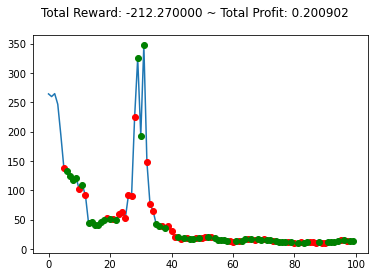

In [13]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
a = env.signal_features
b = env.action_space
state = env.reset()

while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure()
plt.cla()
env.render_all()
plt.show()

# Build and Train the Model

In [14]:
# env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
# env = DummyVecEnv([env_maker])

# model = A2C('MlpLstmPolicy', env, verbose=1) 
# model.learn(total_timesteps=1000000)

# Save and Test the Model

In [ ]:
# env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
# obs = env.reset()
# while True: 
#     obs = obs[np.newaxis, ...]
#     action, _states = model.predict(obs)
#     obs, rewards, done, info = env.step(action)
#     if done:
#         print("info", info)
#         break

In [ ]:
# plt.figure(figsize=(15,6))
# plt.cla()
# env.render_all()
# plt.show()